<a href="https://colab.research.google.com/github/het1752/Deep-Learning/blob/main/Medical_cost_insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
data=pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
data.corr().charges

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [8]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
print(data.sex.unique())
print(data.sex.value_counts())

['female' 'male']
male      676
female    662
Name: sex, dtype: int64


In [10]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


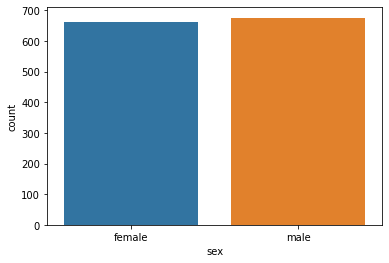

In [11]:
sns.countplot(data['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


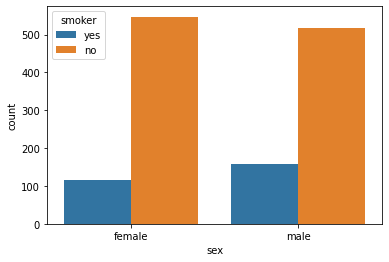

In [12]:
sns.countplot(data['sex'],hue=data['smoker'])

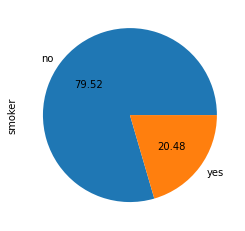

In [13]:
data['smoker'].value_counts().plot(kind='pie',autopct='%0.2f')

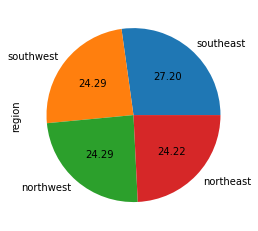

In [14]:
data['region'].value_counts().plot(kind='pie',autopct='%0.2f')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


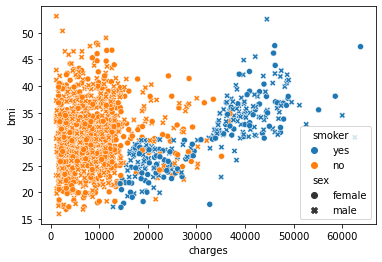

In [15]:
sns.scatterplot(data['charges'],data['bmi'],hue=data['smoker'],style=data['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


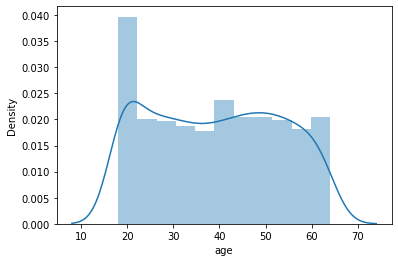

In [16]:
sns.distplot(data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


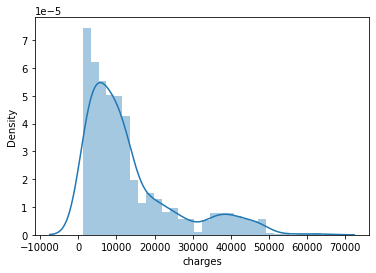

In [17]:
sns.distplot(data['charges'])

In [18]:
data.age.skew()

0.05567251565299186

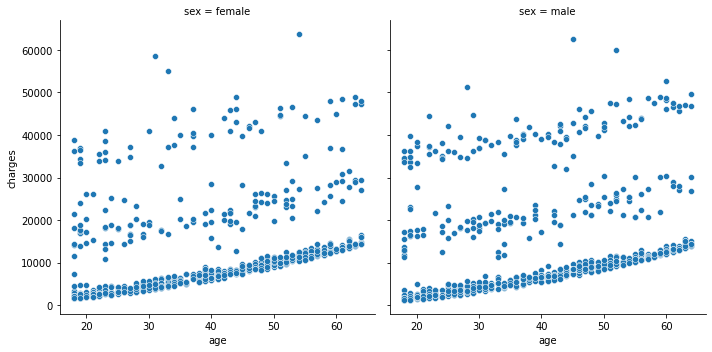

In [19]:
sns.relplot(data=data,x=data['age'],y=data['charges'],col=data['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


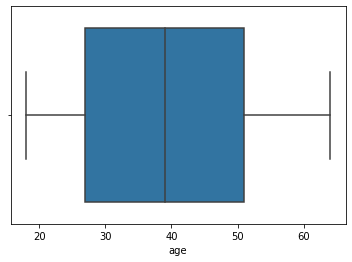

In [20]:
sns.boxplot(data['age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f0ca31f10>,
      dtype=object)

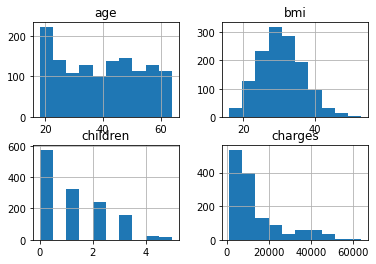

In [21]:
data.hist()

##Convert categorical feature into numeric features

In [22]:
import numpy as np

In [53]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder(sparse=False)
from scipy import sparse
data2=oh.fit_transform(data[['sex','region','smoker']])
data1=data.drop(columns=data[['sex','region','smoker']])
print(data2.dtype)
data3 = pd.DataFrame(data2)
data3.columns = oh.get_feature_names(['sex','region','smoker'])
newdata=pd.concat([data1,data3],axis=1)
newdata=pd.concat([data1,data3],axis=1)
newdata.head()

float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


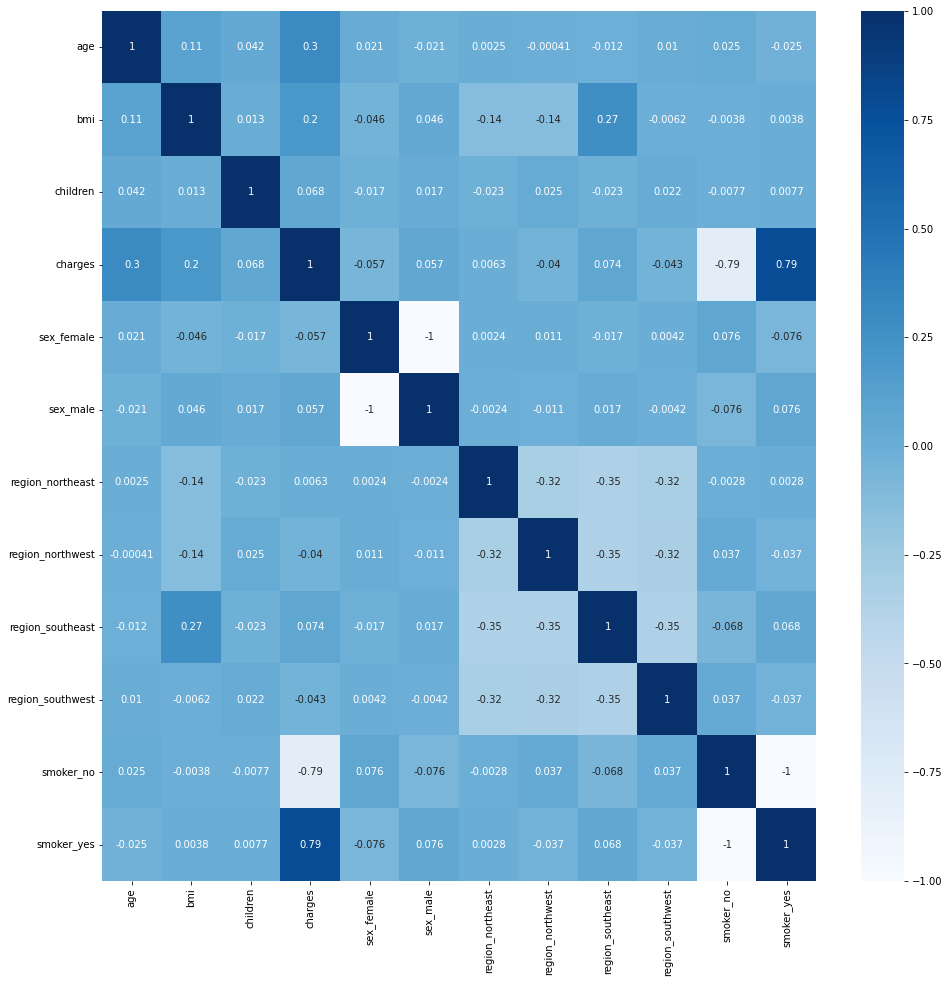

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
sns.heatmap(newdata.corr(),annot=True,cmap='Blues')

In [55]:
newdata.corr()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.002475,-0.000407,-0.011642,0.010016,0.025019,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.022808,0.024806,-0.023066,0.021914,-0.007673,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,0.006349,-0.039905,0.073982,-0.043210,-0.787251,0.787251
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.002425,0.011156,-0.017117,0.004184,0.076185,-0.076185
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.002425,-0.011156,0.017117,-0.004184,-0.076185,0.076185
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945
region_southeast,-0.011642,0.270025,-0.023066,0.073982,-0.017117,0.017117,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498
region_southwest,0.010016,-0.006205,0.021914,-0.043210,0.004184,-0.004184,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945


##now time for train test split

In [56]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   float64
 5   sex_male          1338 non-null   float64
 6   region_northeast  1338 non-null   float64
 7   region_northwest  1338 non-null   float64
 8   region_southeast  1338 non-null   float64
 9   region_southwest  1338 non-null   float64
 10  smoker_no         1338 non-null   float64
 11  smoker_yes        1338 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 125.6 KB


In [57]:
newdata.describe()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.242152,0.242900,0.272048,0.242900,0.795217,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.428546,0.428995,0.445181,0.428995,0.403694,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
newdata.corr()['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
sex_female         -0.057292
sex_male            0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
smoker_no          -0.787251
smoker_yes          0.787251
Name: charges, dtype: float64

##Now time for train-test split

In [121]:
x=newdata.drop(['charges','sex_female','sex_male'],axis=1)
y=newdata.charges

In [122]:
x.shape,y.shape

((1338, 9), (1338,))

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [124]:
len(x_train),len(y_train),len(x_test),len(y_test)

(1070, 1070, 268, 268)

In [169]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 9), (268, 9), (1070,), (268,))

In [182]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_trainscal=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

##It's time to build our ANN Model

In [183]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization

In [187]:
model=Sequential()
model.add(Dense(100,input_dim=9))
model.add(BatchNormalization())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Dense(4))
model.add(BatchNormalization())
model.add(Dense(2))
model.add(BatchNormalization())
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 100)               1000      
                                                                 
 batch_normalization_59 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_75 (Dense)            (None, 64)                6464      
                                                                 
 batch_normalization_60 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_76 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_61 (Bat  (None, 32)             

In [192]:
model.compile(optimizer='adam',loss=tf.keras.losses.mae)

In [195]:
history=model.fit(x_trainscal,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
27/27 [==============================] - 2s 18ms/step - loss: 13509.2607 - val_loss: 12658.1738
Epoch 2/25
27/27 [==============================] - 0s 7ms/step - loss: 13508.9639 - val_loss: 12654.3320
Epoch 3/25
27/27 [==============================] - 0s 6ms/step - loss: 13508.6631 - val_loss: 12652.4512
Epoch 4/25
27/27 [==============================] - 0s 7ms/step - loss: 13508.3555 - val_loss: 12650.9355
Epoch 5/25
27/27 [==============================] - 0s 7ms/step - loss: 13508.0459 - val_loss: 12649.6084
Epoch 6/25
27/27 [==============================] - 0s 6ms/step - loss: 13507.7246 - val_loss: 12647.8916
Epoch 7/25
27/27 [==============================] - 0s 7ms/step - loss: 13507.4023 - val_loss: 12646.7148
Epoch 8/25
27/27 [==============================] - 0s 10ms/step - loss: 13507.0732 - val_loss: 12645.5537
Epoch 9/25
27/27 [==============================] - 0s 7ms/step - loss: 13506.7402 - val_loss: 12644.5488
Epoch 10/25
27/27 [=========================

In [194]:
predy=model.predict(x_test)

9/9 [==============================] - 0s 2ms/step
